In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from datetime import datetime
from __future__ import division
df = pd.read_csv("https://raw.githubusercontent.com/Aum020/Stock-Market-Analysis/master/Datasets/BHARTIARTL.NS.csv?token=AOAVBUECK7YH6DZQSAW6263AO3IKY")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-02,435.000000,460.000000,435.000000,457.399994,457.399994,28174600
1,2020-11-03,458.000000,460.700012,447.450012,454.600006,454.600006,16036760
2,2020-11-04,453.000000,455.549988,447.149994,453.049988,453.049988,10003680
3,2020-11-05,457.000000,461.899994,452.600006,457.299988,457.299988,9234395
4,2020-11-06,457.000000,460.350006,448.750000,449.899994,449.899994,11970462
...,...,...,...,...,...,...,...
56,2021-01-22,583.900024,585.549988,572.750000,576.849976,576.849976,12429589
57,2021-01-25,579.000000,587.849976,569.549988,580.750000,580.750000,12273498
58,2021-01-27,580.000000,581.750000,562.349976,570.799988,570.799988,15280757
59,2021-01-28,566.500000,575.849976,562.750000,570.900024,570.900024,14921448


In [3]:
df['Volume'] = df['Volume']/1000

In [4]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       61 non-null     datetime64[ns]
 1   Open       61 non-null     float64       
 2   High       61 non-null     float64       
 3   Low        61 non-null     float64       
 4   Close      61 non-null     float64       
 5   Adj Close  61 non-null     float64       
 6   Volume     61 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.5 KB


In [5]:
df2 = df[["Date","Open","High","Low", "Close","Adj Close","Volume"]]
df2 = df2.loc[:,["Date","Open","High","Low", "Close","Adj Close", "Volume"]]

In [6]:
type(df2)

pandas.core.frame.DataFrame

In [7]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,513.107377,519.311476,504.392620,512.195080,512.195080,17847.919443
std,44.467088,44.103444,42.305209,42.236601,42.236601,11694.021440
min,435.000000,455.549988,435.000000,449.899994,449.899994,8272.841000
25%,477.000000,483.200012,471.100006,478.600006,478.600006,11608.846000
50%,507.000000,511.200012,499.100006,505.149994,505.149994,14512.799000
75%,532.000000,549.750000,527.099976,540.250000,540.250000,19654.749000
max,609.549988,610.650024,593.799988,602.650024,602.650024,83668.562000


<AxesSubplot:>

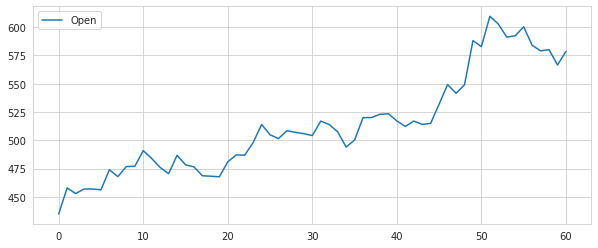

In [8]:
df2['Open'].plot(legend = True,figsize = (10,4))

<AxesSubplot:>

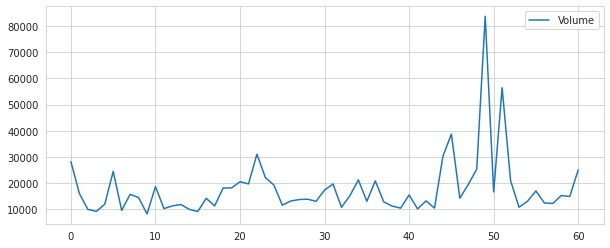

In [9]:
df2['Volume'].plot(legend = True, figsize = (10,4))

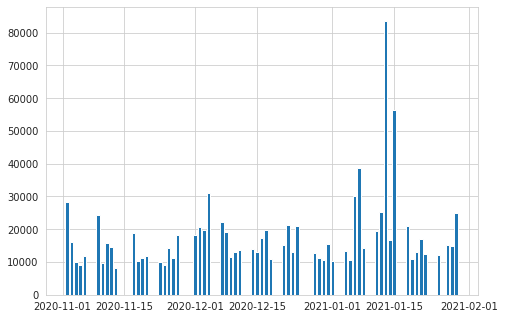

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Date,df['Volume'])
plt.show()

In [11]:
closingprice_df = df2['Volume']
closingprice_df.head(10)

0    28174.600
1    16036.760
2    10003.680
3     9234.395
4    11970.462
5    24493.687
6     9620.279
7    15737.416
8    14512.799
9     8272.841
Name: Volume, dtype: float64

In [12]:
tech_returns = closingprice_df.pct_change()
tech_returns.head()

0         NaN
1   -0.430808
2   -0.376203
3   -0.076900
4    0.296291
Name: Volume, dtype: float64

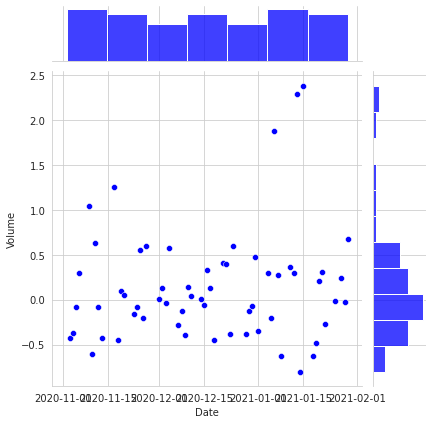

In [13]:
sns.jointplot(x = df['Date'],y = tech_returns,kind='scatter',color='blue')

In [14]:
#Building linear regression model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model supervision
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [15]:
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 


#split the data into train and test sets
X=np.array(df2.index).reshape(-1,1)
Y=df2['Open']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=101)
#feature scaling
scaler=StandardScaler().fit(X_train)

In [16]:
from sklearn.linear_model import LinearRegression
from plotly.graph_objects import layout

In [17]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train,Y_train)


LinearRegression()

In [18]:
# Setting the layout for our plot
layout = go.Layout(
    title='Prices for Airtel',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Prices',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

airtel_data = [{'x':df['Date'], 'y':df['Open']}]
plot = go.Figure(data=airtel_data, layout=layout)

In [19]:
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode ='lines',
    name ='Predicted'
)
airtel_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2=go.Figure(data=airtel_data, layout=layout) 

In [20]:
iplot(plot2)

In [21]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8369880432002641	0.894005995849643
MSE       332.9128898977879	190.28094994603904



In [22]:
#Split into train and test data
df.drop('Date',axis =1, inplace = True)
data_X = df.loc[:,df.columns != 'Open']
data_Y = df['Open']
train_X, test_X, train_y, test_y = train_test_split(data_X,data_Y, test_size = 0.4)
print('\n\nTraining Set')
print(train_X.head())
print(train_y.head())



Training Set
          High         Low       Close   Adj Close     Volume
29  506.799988  498.100006  504.200012  504.200012  13074.733
5   474.750000  452.549988  471.799988  471.799988  24493.687
56  585.549988  572.750000  576.849976  576.849976  12429.589
58  581.750000  562.349976  570.799988  570.799988  15280.757
17  469.649994  460.100006  468.399994  468.399994  11322.533
29    505.850006
5     456.299988
56    583.900024
58    580.000000
17    468.700012
Name: Open, dtype: float64


In [23]:
#Creating the regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression()

In [24]:
#Make predictions and evaluate the results

predict_y = regressor.predict(test_X)
print('Prediction Score: ',regressor.score(test_X,test_y))
error = mse(test_y,predict_y)
print('Mean Squared Error: ',error)

Prediction Score:  0.9926728959120272
Mean Squared Error:  14.686727548302029


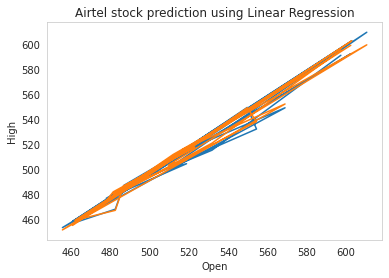

In [25]:
#Plot the predicted and the expected values
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel = 'Open', ylabel = 'High',title='Airtel stock prediction using Linear Regression')
ax.plot(test_X['High'],test_y)
ax.plot(test_X['High'],predict_y)

plt.show()


